# Week 4 Notebook: Data Preprocessing
The goal of this week's assignment is to continue to preprocess our data by cleaning it, treating issues such as outliers and missing values, transforming variables, and making the data model-ready. 

### Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import zipfile

### Read data as dataframe

In [2]:
"""
current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)

data_folder = os.path.join(parent_dir,"data")
raw_data_folder = os.path.join(data_folder,"raw")

uber_file_path = os.path.join(raw_data_folder, "uber.csv.zip")
lyft_file_path = os.path.join(raw_data_folder, "lyft.csv.zip")
"""

'\ncurrent_dir = os.getcwd()\nparent_dir = os.path.dirname(current_dir)\n\ndata_folder = os.path.join(parent_dir,"data")\nraw_data_folder = os.path.join(data_folder,"raw")\n\nuber_file_path = os.path.join(raw_data_folder, "uber.csv.zip")\nlyft_file_path = os.path.join(raw_data_folder, "lyft.csv.zip")\n'

In [ ]:
"""
if os.path.exists(uber_file_path):
    with zipfile.ZipFile(uber_file_path, 'r') as zip_ref:
        zip_ref.extractall(raw_data_folder)
    print(f"Uber file extracted to: {raw_data_folder}")
else:
    print(f"Uber file not found: {uber_file_path}")

if os.path.exists(lyft_file_path):
    with zipfile.ZipFile(lyft_file_path, 'r') as zip_ref:
        zip_ref.extractall(raw_data_folder)
    print(f"Lyft file extracted to: {raw_data_folder}")
else:
    print(f"Lyft file not found: {lyft_file_path}")
"""

In [4]:
"""
uber_csv_path = os.path.join(raw_data_folder, "uber.csv")
lyft_csv_path = os.path.join(raw_data_folder, "lyft.csv")

uber_df = pd.read_csv(uber_csv_path)
lyft_df = pd.read_csv(lyft_csv_path)
    
df = pd.concat([uber_df, lyft_df], ignore_index=True)
"""

In [3]:
# Load the data as a pandas dataframe.
df = pd.read_csv('rideshare_kaggle.csv')

### Split the dataset into training, testing, and validation sets
- training set is 70% of the dataframe
- validation set is 20% of the dataframe
- test set is 10% of the dataframe

In [4]:
def train_val_test_split(df):
    # Suffle the dataset and calculate the size of validation and test sets

    df = df.sample(frac=1, random_state=123)

    val_size = int(len(df) * 0.2)
    test_size = int(len(df) * 0.1)

    # Select rows based on the val_size and test_size to store as train set, val set, and test set
    train_df = df.iloc[val_size + test_size:]
    val_df = df.iloc[:val_size]
    test_df = df.iloc[val_size:val_size + test_size]
    return train_df, val_df, test_df

train_df, val_df, test_df = train_val_test_split(df)


In [5]:
cat_col = [col for col in df.columns if df[col].dtype == 'object']
cat_col = [
 'timezone',
 'source',
 'destination',
 'cab_type',
 'product_id',
 'name',
 'short_summary',
 'long_summary',
 'icon']
num_col = [col for col in df.columns if col not in cat_col]

# Remove 'id' and 'datetime' from the list of column names
num_col = [col for col in num_col if col not in ['id', 'datetime']]

print(f"cat_col = {len(cat_col)}\nnum_col = {len(num_col)}\n")

cat_col = 9
num_col = 46



In [6]:
num_col

['timestamp',
 'hour',
 'day',
 'month',
 'price',
 'distance',
 'surge_multiplier',
 'latitude',
 'longitude',
 'temperature',
 'apparentTemperature',
 'precipIntensity',
 'precipProbability',
 'humidity',
 'windSpeed',
 'windGust',
 'windGustTime',
 'visibility',
 'temperatureHigh',
 'temperatureHighTime',
 'temperatureLow',
 'temperatureLowTime',
 'apparentTemperatureHigh',
 'apparentTemperatureHighTime',
 'apparentTemperatureLow',
 'apparentTemperatureLowTime',
 'dewPoint',
 'pressure',
 'windBearing',
 'cloudCover',
 'uvIndex',
 'visibility.1',
 'ozone',
 'sunriseTime',
 'sunsetTime',
 'moonPhase',
 'precipIntensityMax',
 'uvIndexTime',
 'temperatureMin',
 'temperatureMinTime',
 'temperatureMax',
 'temperatureMaxTime',
 'apparentTemperatureMin',
 'apparentTemperatureMinTime',
 'apparentTemperatureMax',
 'apparentTemperatureMaxTime']

### Missing Value Investigation

In [7]:
df.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

In [10]:
# Check the percentage of missing values in 'price'
df_na = df[df['price'].isna()]
missing_percentage = df['price'].isna().sum() / len(df) * 100
print(f"Percentage of missing values in 'price': {missing_percentage:.2f}%")

Percentage of missing values in 'price': 7.95%


We are missing `price` for 55,095 rows (roughly 8% of the dataframe).

### Visualization for Missing Values

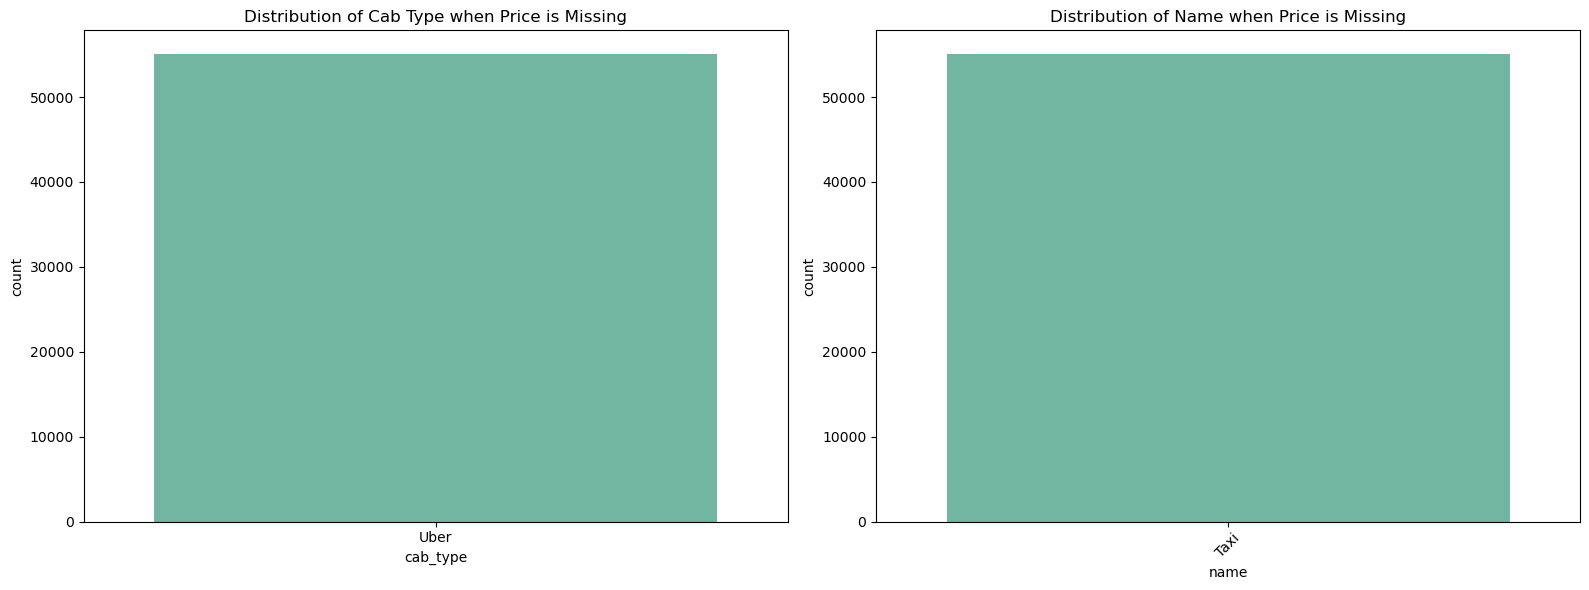

In [27]:
# Set up a 3x2 grid for subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Distribution of 'cab_type' when 'price' is missing
sns.countplot(x='cab_type', data=df_na, palette='Set2', ax=axes[0])
axes[0].set_title('Distribution of Cab Type when Price is Missing')

# Distribution of 'name' when 'price' is missing
sns.countplot(x='name', data=df_na, palette='Set2', order=df_na['name'].value_counts().index, ax=axes[1])
axes[1].set_title('Distribution of Name when Price is Missing')
axes[1].tick_params(axis='x', rotation=45)


# Adjust layout
plt.tight_layout()
plt.show()


As illustrated in the graphs, the only type of ride that has a missing price is `cab_type` 'Uber' and `name` 'Taxi'. For `name`, the unique classes are: ['Shared' 'Lux' 'Lyft' 'Lux Black XL' 'Lyft XL' 'Lux Black' 'UberXL' 'Black' 'UberX' 'WAV' 'Black SUV' 'UberPool' 'Taxi'].

### Missing Value Imputation 

Uber has a ride option called 'Taxi', which pairs riders with local taxi cab drivers. Every observation labeled 'taxi' is missing the price, and there are no missing values for any other type of ride. Therefore, we plan to impute the missing values with prices based on the distance of the ride and the Boston Taxi rate. 

Taxi rates are available publicly on boston.gov at the link below. 

https://police.boston.gov/taxi-rates/ 

We are not sure whether Uber charges exact taxi rates for their taxi option or if there are any additional fees. Since this is our best estimate, we will impute prices based on the exact taxi rate. 

In [28]:
# First, check if all the Uber Taxi `Price` is missing.
df_taxi = df[df["name"]== "Taxi"]

df_taxi.describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,5.509500e+04,55095.000000,55095.000000,55095.000000,0.0,55095.000000,55095.0,55095.000000,55095.000000,55095.000000,...,55095.000000,5.509500e+04,55095.000000,5.509500e+04,55095.000000,5.509500e+04,55095.000000,5.509500e+04,55095.000000,5.509500e+04
mean,1.544046e+09,11.626191,17.756040,11.588238,NaN,2.191383,1.0,42.338303,-71.066230,39.607343,...,0.037436,1.544045e+09,33.476342,1.544042e+09,45.277155,1.544048e+09,29.753849,1.544049e+09,42.014321,1.544049e+09
std,6.890791e+05,6.940503,9.984649,0.492157,NaN,1.178985,0.0,0.047654,0.020286,6.732861,...,0.055190,6.909305e+05,6.477382,6.900481e+05,5.652388,6.898592e+05,7.117307,6.870186e+05,6.951950,6.907825e+05
min,1.543204e+09,0.000000,1.000000,11.000000,NaN,0.020000,1.0,42.214800,-71.105400,18.910000,...,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543444e+09,6.000000,13.000000,11.000000,NaN,1.300000,1.0,42.350300,-71.081000,36.500000,...,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543739e+09,12.000000,17.000000,12.000000,NaN,2.170000,1.0,42.351900,-71.063100,40.550000,...,0.000400,1.543770e+09,34.240000,1.543727e+09,44.680000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,1.544828e+09,18.000000,28.000000,12.000000,NaN,2.840000,1.0,42.364700,-71.054200,43.610000,...,0.091600,1.544807e+09,38.940000,1.544789e+09,46.910000,1.544814e+09,35.710000,1.544789e+09,44.120000,1.544818e+09
max,1.545161e+09,23.000000,30.000000,12.000000,NaN,7.860000,1.0,42.366100,-71.033000,57.220000,...,0.145900,1.545152e+09,43.100000,1.545192e+09,57.870000,1.545109e+09,40.050000,1.545134e+09,57.200000,1.545109e+09


In [29]:
# Define a function to calculate the Taxi price based on the distance
def calculate_taxi_fare(distance):
    base_fare = 2.60  # First 1/7 mile costs $2.60
    additional_fare_per_seventh = 0.40  # Each 1/7 mile thereafter costs $0.40
    if distance <= 1/7:
        return base_fare
    else:
        additional_fare = (distance - 1/7) // (1/7) * additional_fare_per_seventh
        return base_fare + additional_fare

In [30]:
# Apply the function to impute missing prices for Taxi rides
df.loc[df['name'] == 'Taxi', 'price'] = df.loc[df['name'] == 'Taxi', 'distance'].apply(calculate_taxi_fare)

In [31]:
# Check if the prices have been correctly imputed
df_taxi = df[df["name"] == "Taxi"]
df_taxi[['distance', 'price']].head()

,distance,price
18,1.11,5.0
31,2.48,9.0
40,2.94,10.2
60,1.16,5.4
69,2.67,9.4


In [32]:
# Check for any missing values after imputing
df.isnull().sum()

id                             0
timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatur

In [34]:
df_na = df[df['price'].isna()]
missing_percentage_after_imputing = df['price'].isna().sum() / len(df) * 100
print(f"Percentage of missing values in 'price' after imputing: {missing_percentage_after_imputing:.2f}%")

Percentage of missing values in 'price' after imputing: 0.00%
